# Analyzing Star Wars Survey Data

For this project, we will be examining a dataset created by FiveThirtyEight containing information from Star Wars fans and their opinions of the movies. 

In [1]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

Because of the format of the survey, the dataset will require a large amount of cleaning. The columns shown below are a good example of this, with many of the columns with some variation of 'Unnamed'. This is a result of the survey having multiple options for each question. 

In [2]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]

star_wars['RespondentID'].isnull().sum()

0

# Converting Columns to Boolean Values

The next step in cleaning the data will be to convert the yes/no answers in columns 2 and 3.

In [4]:
bool_map = {'Yes':True, 'No':False}

star_wars.iloc[:,1] = star_wars.iloc[:,1].map(bool_map)
star_wars.iloc[:,2] = star_wars.iloc[:,2].map(bool_map)

star_wars.iloc[:5,1:3]

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,True,True
2,False,NaN
3,True,False
4,True,True
5,True,True


The format of the next few columns is a bit confusing. The original question is the column name for column 4, asking the respondent to select all of the Star Wars films that he/she had seen. In this column, there are only two values, "Star Wars Episode I: The Phantom Menace" and null values. 

If these cells contain the movie title, the respondent indicated that they had seen the film. This is the case for the next few columns as well, with the only difference being the movie title. We can also convert these columns to boolean values to make the data set easier to understand and also change the column names.

In [5]:
import numpy as np

movies = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movies)

In [6]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
        "Unnamed: 4": "seen_2",
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
        })

star_wars.iloc[:5,3:9]

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


# Movie Rankings

Similarly to the last column group that we examined, the next group contains rankings for each respondents preferences between the 6 movies. These are laid out in the same order as the previous group as well, with the column containing the original question corresponding to 'Episode 1'.

In [7]:
star_wars.iloc[:5,9:15]

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3


Luckily, we will only need to convert the data type of the cells to a float and rename the columns.

In [8]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'rank_1',
    'Unnamed: 10':'rank_2',
    'Unnamed: 11':'rank_3',
    'Unnamed: 12':'rank_4',
    'Unnamed: 13':'rank_5',
    'Unnamed: 14':'rank_6'
})

star_wars.iloc[:5,9:15]

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


Now we can perform some quantitative analysis on this portion of the dataset. For the next step, we will calculate the mean score for each movie and plot them in a bar chart.

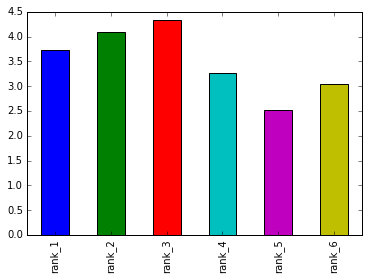

In [9]:
%matplotlib inline

rank_means = star_wars.iloc[:,9:15].mean()

rank_means.plot.bar()

We can see that fans enjoyed Episode V the most out of the two trilogies. Respondents also preferred the Original Trilogy more than the first. I am curious of the typical age of these respondents and whether that affects how fans percieve the movies (i.e. younger fans prefer the newer movies, older fans prefer the originals). 

# Responses by Age

In [10]:
star_wars['Age'].value_counts()

45-60    291
> 60     269
30-44    268
18-29    218
Name: Age, dtype: int64

In [11]:
age1 = star_wars[star_wars['Age'] == '18-29']
age2 = star_wars[star_wars['Age'] == '30-44']
age3 = star_wars[star_wars['Age'] == '45-60']
age4 = star_wars[star_wars['Age'] == '> 60']

## Ages 18-29

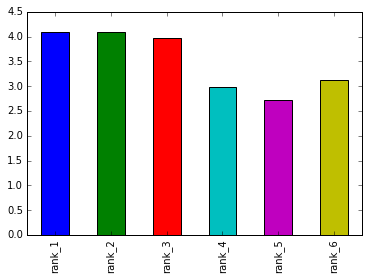

In [12]:
age1_means = age1.iloc[:,9:15].mean()
age1_means.plot.bar()

## Ages 30-44

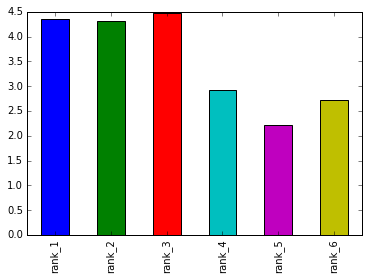

In [13]:
age2_means = age2.iloc[:,9:15].mean()
age2_means.plot.bar()

## Ages 40-60

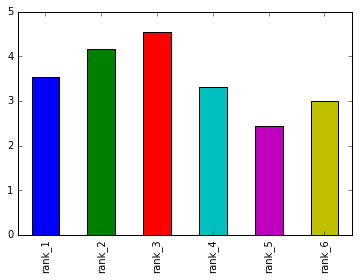

In [14]:
age3_means = age3.iloc[:,9:15].mean()
age3_means.plot.bar()

## Ages 60+

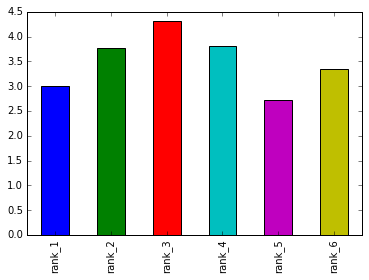

In [15]:
age4_means = age4.iloc[:,9:15].mean()
age4_means.plot.bar()

Interestingly, the respondents tend to have the same relative preferences no matter their age. More so, my hypothesis that younger audiences would prefer the Prequel Trilogy was wrong. There are actually higher preferences for the newer movies among the older demographics of the survey.

# Responses by Gender

In [16]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

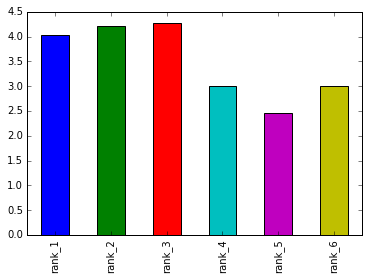

In [17]:
male_means = males.iloc[:,9:15].mean()

male_means.plot.bar()

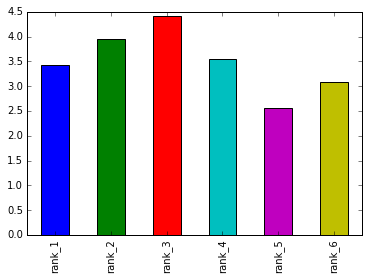

In [18]:
female_means = females.iloc[:,9:15].mean()

female_means.plot.bar()

We can see that the same trend occurs between the movies regardless of the gender of the respondent.

# Favorite Characters

Columns 15-29 contain the respondents answers on their character preferences. Similary to the rankings and viewing responses, these will need the column names and responses cleaned. To do this, we will need to read the original file again to see the names of each character.

In [19]:
star_wars_original = pd.read_csv('star_wars.csv')

star_wars_original.iloc[:1,15:29]

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda


In [20]:
star_wars = star_wars.rename(columns={
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'Han Solo',
    'Unnamed: 16': 'Luke Skywalker',
    'Unnamed: 17': 'Princess Leia Organa',
    'Unnamed: 18': 'Anakin Skywalker',
    'Unnamed: 19': 'Obi Wan Kenobi',
    'Unnamed: 20': 'Emperor Palpatine',
    'Unnamed: 21': 'Darth Vader',
    'Unnamed: 22': 'Lando Calrissian',
    'Unnamed: 23': 'Boba Fett',
    'Unnamed: 24': 'C-3PO',
    'Unnamed: 25': 'R2 D2',
    'Unnamed: 26': 'Jar Jar Binks',
    'Unnamed: 27': 'Padme Amidala',
    'Unnamed: 28': 'Yoda'
})

We can set the responses up on a scale of 1-5, with 0 being "Very unfavorably" and 5 being "Very favorably". For "Unfamiliar" responses, we will leave them as null values.

In [21]:
character_map = {
    'Very favorably': 5,
    'Somewhat favorably': 4,
    'Neither favorably nor unfavorably (neutral)': 3,
    'Somewhat unfavorably': 2,
    'Very unfavorably': 1,
    'Unfamiliar (N/A)': np.nan
}

for col in star_wars.columns[15:29]:
    star_wars[col] = star_wars[col].map(character_map)

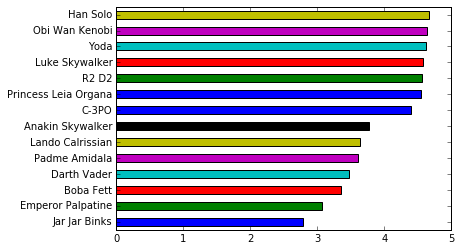

In [22]:
character_means = star_wars.iloc[:,15:29].mean()
character_means = character_means.sort_values()

character_means.plot.barh()

We can see that, similar to the movies themselves, fans prefer the characters from the original trilogy the most. Also, it is clear that fans prefer the heroes as opposed to the villians, with poor Jar Jar Binks being the only non-villian in the bottom four. 

# Han Shot First

In [23]:
first_shot = star_wars['Which character shot first?']
first_shot.value_counts()

Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

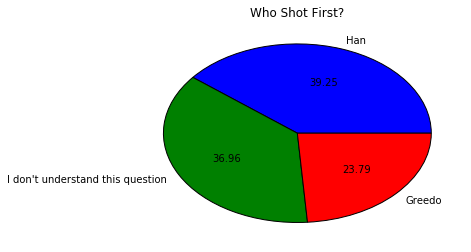

In [31]:
import matplotlib.pyplot as plt
first_shot_df = pd.DataFrame(first_shot.value_counts())

first_shot_df.plot(kind='pie', 
                   y='Which character shot first?', 
                   legend=False, 
                   label="", 
                   autopct='%.2f', 
                   title='Who Shot First?'
                  )

The pie chart above shows how respondents feel about the iconic scene in the Mos Eisley cantina with Han Solo and the bounty hunter Greedo. Unfortunately, many respondents do not understand the reference, which is often called on when fans discuss George Lucas's edits for newer versions of the Original Trilogy.